In [2]:
import os
import torch

from dpnegf.runner.NEGF import NEGF
from dptb.nn.build import build_model
import json

from dpnegf.utils.loggers import set_log_handles
import logging
from pathlib import Path

import matplotlib.pyplot as plt

In [3]:
INPUT_file =  "./input_files/negf_chain_new.json" 
model =  "./input_files/nnsk_C_new.json"
structure =  "./input_files/chain.vasp" 
output = "output"  

if os.path.exists(output):
    os.system('rm -rf %s' % output)


negf_json = json.load(open(INPUT_file))
model_json = json.load(open(model))

log_path = output+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

model = build_model(model,model_options= model_json['model_options'],
                    common_options=model_json['common_options'])
negf = NEGF(
    model=model,
    AtomicData_options=negf_json['AtomicData_options'],
    structure=structure,
    results_path=output,  
    **negf_json['task_options']
)
   
negf.compute()

DPNEGF WARNING The model option atomic_radius in nnsk is not defined in input model_options, set to v1.
DPNEGF INFO    ------ k-point for NEGF -----
DPNEGF INFO    Gamma Center: True
DPNEGF INFO    Time Reversal: True
DPNEGF INFO    k-points Num: 1
DPNEGF INFO    k-points: [[0 0 0]]
DPNEGF INFO    k-points weights: [1.]
DPNEGF INFO    --------------------------------
DPNEGF INFO    The AtomicData_options is {'r_max': 2.0}
/opt/mamba/envs/deeptb-dev/lib/python3.10/site-packages/torch/nested/__init__.py:58: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  return torch._nested_tensor_from_tensor_list(tensor_list, dtype, None, device, None)
DPNEGF INFO    The coupling width of lead_L is 1.
DPNEGF INFO    The coupling width of lead_R is 1.
DPNEGF INFO    --------------------------------------------------------------------------------
DPNEGF INFO    The Hamiltonian h

In [4]:
negf_out = torch.load('./output/negf.out.pth')

In [5]:
negf_out.keys()

dict_keys(['k', 'wk', 'uni_grid', 'DOS', 'T_k', 'LDOS', 'T_avg', 'BIAS_POTENTIAL_NSCF', 'CURRENT_NSCF'])

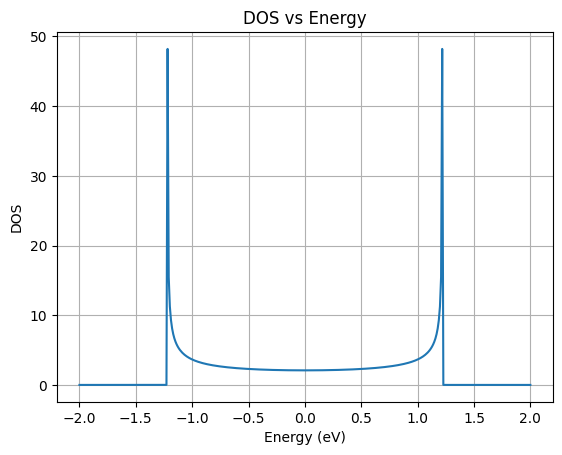

In [5]:
plt.plot(negf_out['uni_grid'], negf_out['DOS'][str(negf_out['k'][0])])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.title('DOS vs Energy')
plt.grid()
plt.show()

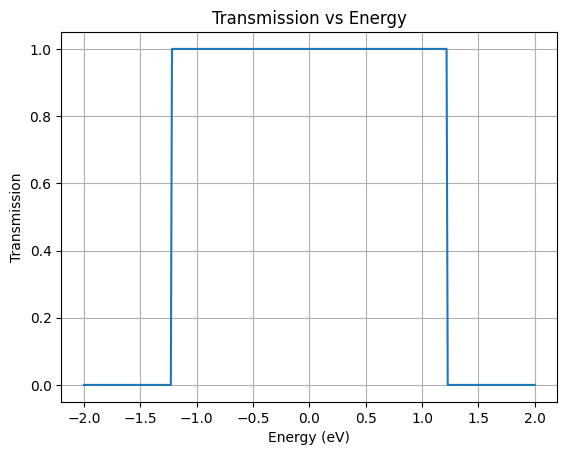

In [6]:
plt.plot(negf_out['uni_grid'], negf_out['T_avg'])
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.title('Transmission vs Energy')
plt.grid()
plt.show()

- 待解决：
  - 数据格式检查
  - 标准的input.json